In [1]:
import os
#Import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, to_rgba
from matplotlib.ticker import StrMethodFormatter
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker
import matplotlib.ticker as mticker

(360, 720)


/var/folders/xf/593p9qkj38s0m2gtl3jmd8n80000gn/T/ipykernel_76306/2887128849.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  v = cm.get_cmap('plasma', 16*(len(colors)-2))


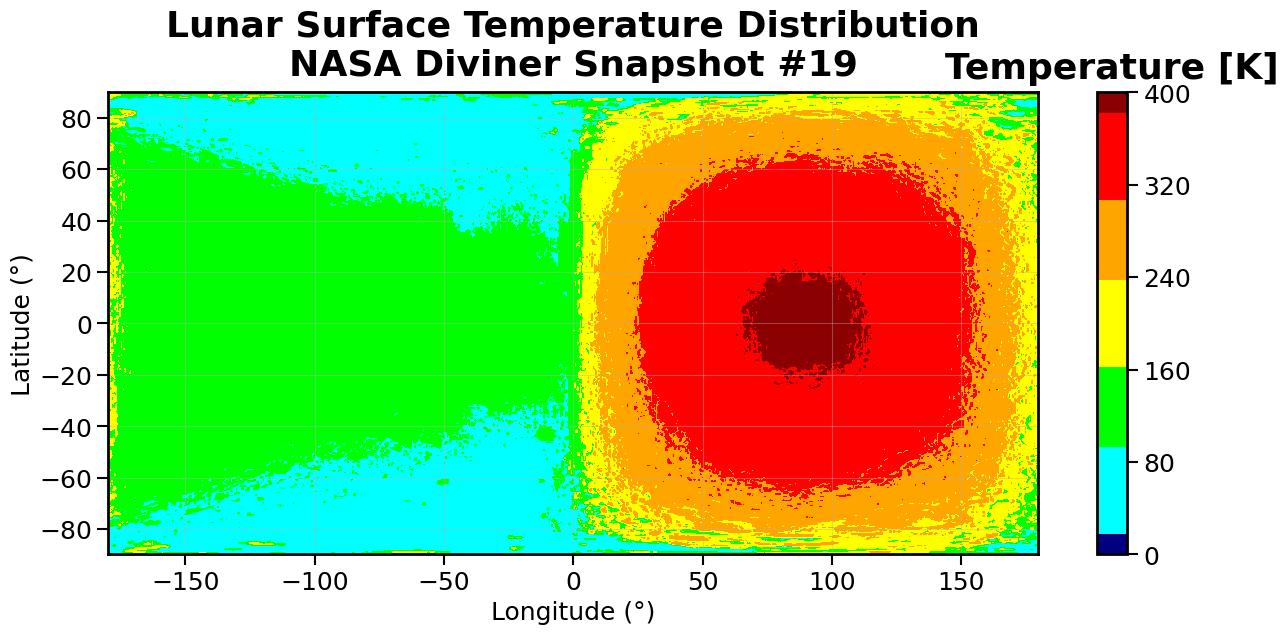

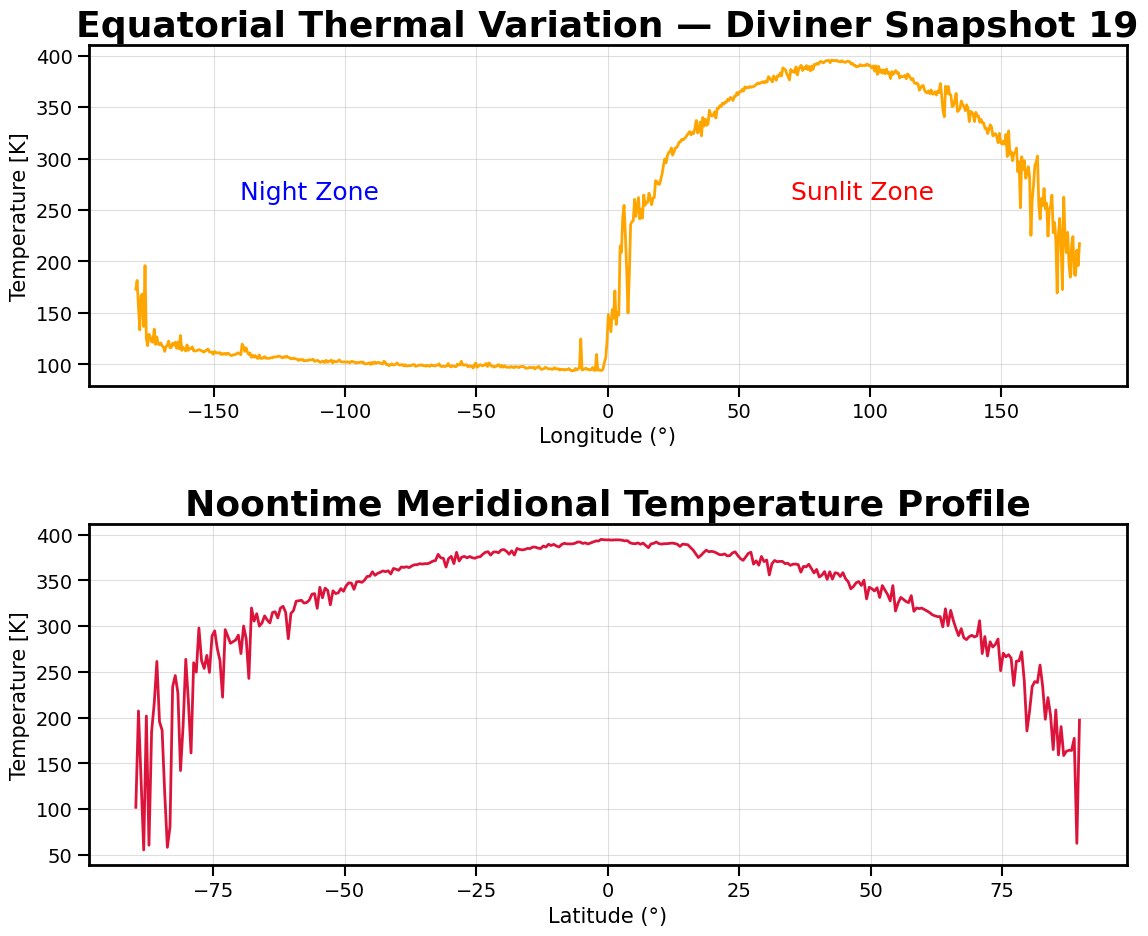

In [2]:
# Define graphic styles with font and figure sizes etc.
styledict = {
    'xtick.labelsize':22,
    'xtick.major.size':8,
    'xtick.major.width':1.5,
    'ytick.labelsize':22,
    'ytick.major.size':8,
    'ytick.major.width':1.5,
    'legend.framealpha':0.0,
    'legend.fontsize':14,
    'axes.labelsize':18,
    'axes.titlesize':26,
    'axes.linewidth':2,
    'figure.figsize':(13,7),
    'savefig.format':'jpg'
}
plt.rcParams.update(**styledict)

def new_col_map(colors):
    """
    Creates a custom colormap from a list of colors.
    """
    first = np.repeat([to_rgba(colors[0])], 4, axis=0)
    last = np.repeat([to_rgba(colors[-1])], 4, axis=0)
    v = cm.get_cmap('plasma', 16*(len(colors)-2))
    newcolors = v(np.linspace(0, 1, 16*(len(colors)-2)))
    for (i, col) in enumerate(colors[1:-1]):
        newcolors[16*i : 16*(i+1), :] = to_rgba(col)
    return ListedColormap(np.append(np.append(first,newcolors, axis=0), last, axis=0))

# Load data
m19 = pd.read_csv("data/moon_temp_snapshot_half_deg.txt", sep=r'\s+', header=None)
mapmat = np.array(m19.iloc[:,2]).reshape(720,360).T
print(mapmat.shape)

lat1 = np.linspace(-89.75, 89.75, 360)
lon1 = np.linspace(-179.75, 179.75, 720)

# Adjust data for visualization consistency
mapmat[mapmat == mapmat.max()] = 400
mapmat[mapmat == mapmat.min()] = 0

clev = np.linspace(mapmat.min(), mapmat.max(), 70)

# Create a new colormap
colors = ['navy', 'cyan', 'lime', 'yellow', 'orange', 'red', 'darkred']
myColMap = new_col_map(colors)

# Plot the moon temperature map
plt.figure(figsize=(15,6))
contf = plt.contourf(lon1, lat1, mapmat, clev, cmap=myColMap)

colbar = plt.colorbar(contf, drawedges=False, ticks=[0, 80, 160, 240, 320, 400], aspect=15)
colbar.ax.set_title('Temperature [K]', fontweight="bold", pad=10)
colbar.ax.tick_params(labelsize=18)

plt.title("Lunar Surface Temperature Distribution\nNASA Diviner Snapshot #19", fontweight="bold", pad=12)
plt.xlabel("Longitude (°)", size=18)
plt.ylabel("Latitude (°)", size=18)
plt.tick_params(labelsize=18)
plt.grid(alpha=0.4)
# plt.savefig("LunarSurfaceTemp_Map.jpg", bbox_inches='tight')

# Equatorial and meridional slices
equ = np.where((lat1 < .5) & (lat1 > -.5))[0]
equatorial = mapmat[equ[0]]

merid = np.where((lon1 < 90.5) & (lon1 > 89.5))[0]
meridion = mapmat[:, merid[0]]

plt.rcParams['figure.figsize'] = (12,10)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12,10))

# Equatorial profile
ax[0].plot(lon1, equatorial, color='orange', lw=2)
ax[0].text(-140, 260, "Night Zone", size=18, color='blue')
ax[0].text(70, 260, "Sunlit Zone", size=18, color='red')
ax[0].set_xlabel("Longitude (°)", size=15)
ax[0].set_ylabel("Temperature [K]", size=15)
ax[0].set_title("Equatorial Thermal Variation — Diviner Snapshot 19", fontweight="bold")
ax[0].grid(alpha=0.4)
ax[0].tick_params(labelsize=14)

# Meridional profile
ax[1].plot(lat1, meridion, color='crimson', lw=2)
ax[1].set_xlabel("Latitude (°)", size=15)
ax[1].set_ylabel("Temperature [K]", size=15)
ax[1].set_title("Noontime Meridional Temperature Profile", fontweight="bold")
ax[1].grid(alpha=0.4)
ax[1].tick_params(labelsize=14)

fig.tight_layout(pad=3)
# fig.savefig("LunarTempProfiles.jpg", bbox_inches='tight')
# Colormap should be linearlly segmented

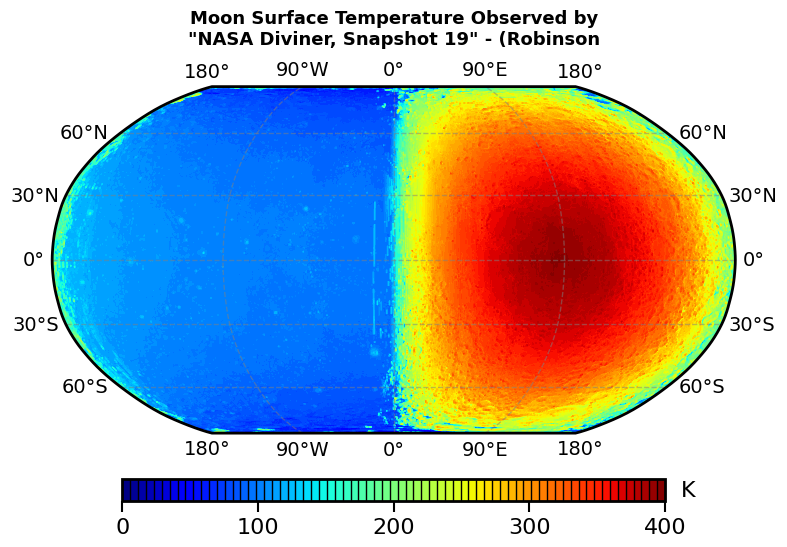

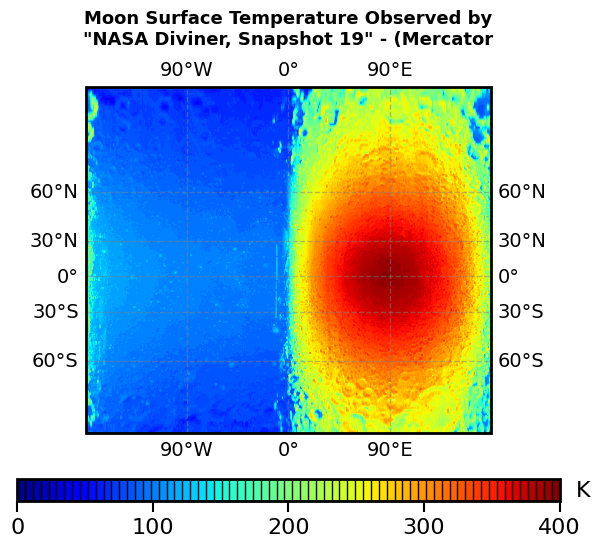

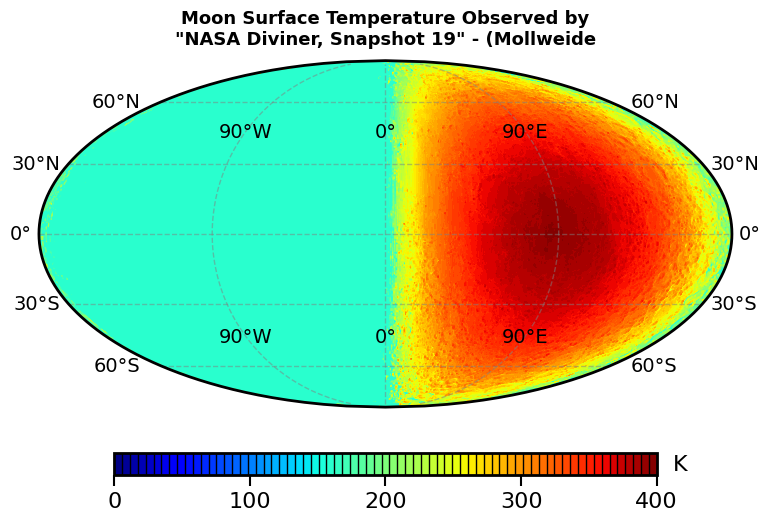

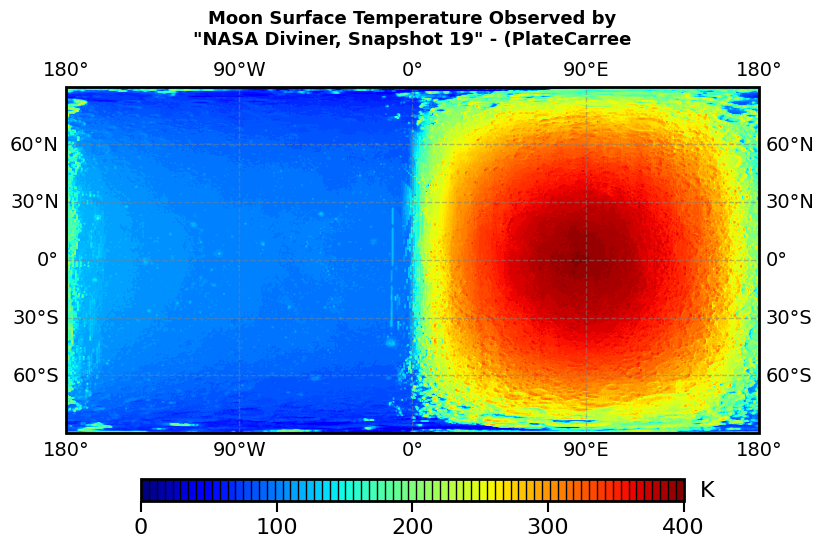

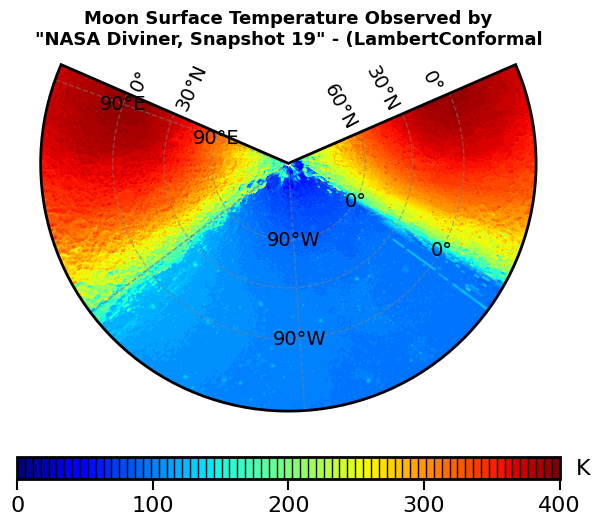

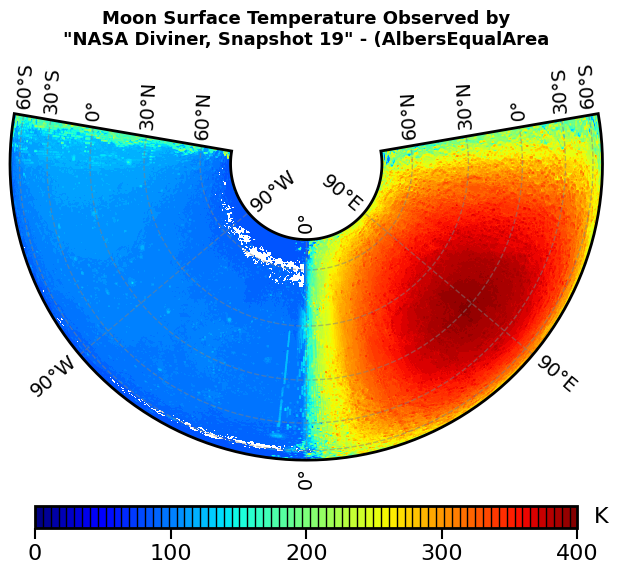

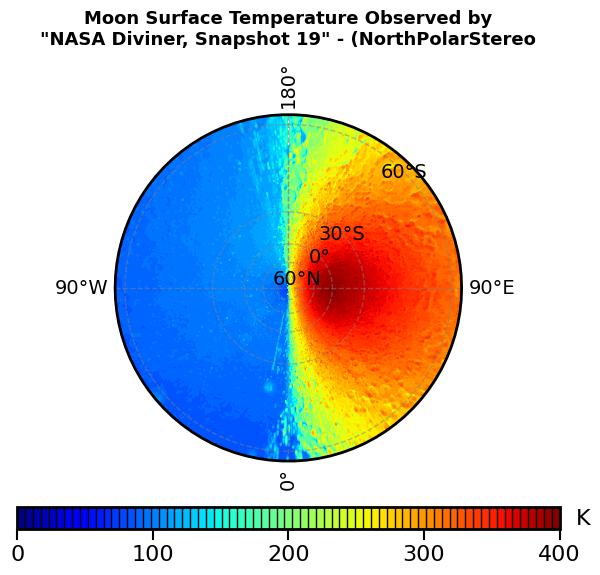

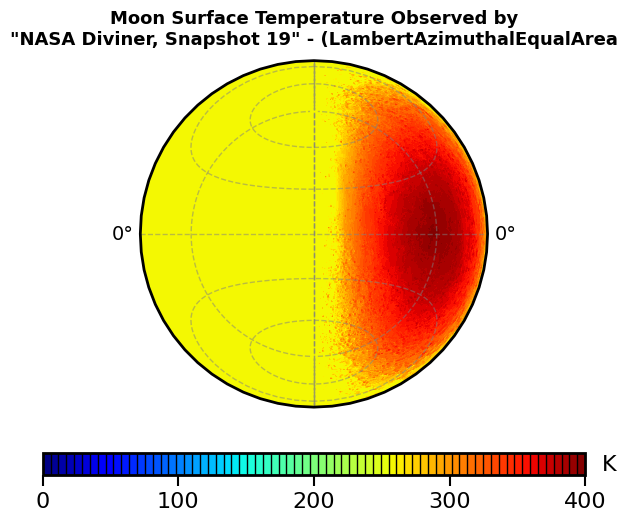

In [4]:
# Create the figure and axis with Robinson projection
ccrs_type = ['Robinson', 'Mercator', 'Mollweide', 'PlateCarree', 'LambertConformal', 'AlbersEqualArea', 'NorthPolarStereo', 'LambertAzimuthalEqualArea']
for i in range(len(ccrs_type)):
    match ccrs_type[i]:
        case 'Robinson': #0
            fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.Robinson()})
        case 'Mercator': #1
            fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.Mercator()})
        case 'Mollweide': #2
            fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.Mollweide()})
        case 'PlateCarree': #3
            fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.PlateCarree()})
        case 'LambertConformal': #4
            fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.LambertConformal()})
        case 'AlbersEqualArea': #5
            fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.AlbersEqualArea()})
        case 'NearsidePerspective': #6
            fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.NearsidePerspective()})
        case 'NorthPolarStereo': #7
            fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.NorthPolarStereo()})
        case 'LambertAzimuthalEqualArea': #8
            fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.LambertAzimuthalEqualArea()})
        case _: #Other defaults back to Robinson
            fig, ax = plt.subplots(figsize=(14, 6), subplot_kw={'projection': ccrs.Robinson()})

    # Add map features
    ax.set_global()
    #ax.coastlines() #no coastal lines etc for Moon
    #ax.add_feature(cfeature.LAND, facecolor='lightgray')
    #ax.add_feature(cfeature.OCEAN, facecolor='lightblue')

    # Plot filled contours
    contf = ax.contourf(
        lon1, lat1, mapmat, clev,
        transform=ccrs.PlateCarree(),
        cmap='jet'
    )

    # Create a shorter colorbar below the map
    cbar = plt.colorbar(contf, ax=ax, orientation='horizontal',
            drawedges=True, ticks=[0, 100, 200, 300, 400],
                        aspect=25, pad=0.1, shrink=0.5)

    cbar.ax.set_title("")  # Remove top label
    cbar.ax.text(1.03, 0.5, 'K', transform=cbar.ax.transAxes,
                fontsize=16, va='center')  # place "K" at right
    cbar.ax.tick_params(labelsize=16)

    ax.set_title(f"Moon Surface Temperature Observed by\n\"NASA Diviner, Snapshot 19\" - ({ccrs_type[i]}", fontweight="bold",fontsize=13, pad=12)

    #grid lines
    gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray',
                    alpha=0.5, linestyle='--')
    #longitude ticks
    gl.xlocator = mticker.FixedLocator([-180, -90, 0, 90, 180])
    gl.xlabel_style = {'size': 14}
    gl.top_labels = True
    gl.bottom_labels = True

    # latitude ticks
    gl.ylocator = mticker.FixedLocator([-90, -60, -30, 0, 30, 60, 90])
    gl.ylabel_style = {'size': 14}
    gl.left_labels = True
    gl.right_labels = True

    # Show the plot
    plt.show()